In [11]:
import numpy as np
import pandas as pd
import shap
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_percentage_error as mape

# Load the dataset

In [2]:
dataset = fetch_california_housing(as_frame=True)
X = dataset['data']
y = dataset['target']

# Prepare the data and fit the model

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

# Create an explainer object and calculate SHAP values for the test set

In [4]:
explainer = shap.Explainer(model.predict, X_train)
shap_values = explainer(X_test)

ExactExplainer explainer: 4129it [09:56,  6.81it/s]                                                                                                                                                                   


# Check the most important features by the absolute value based on SHAP

In [5]:
# Calculate mean absolute SHAP values for each feature
feature_importance = pd.DataFrame(list(zip(X.columns, np.abs(shap_values.values).mean(axis=0))), 
                                   columns=['Feature', 'Mean Absolute SHAP Value'])
important_features = feature_importance.sort_values(by='Mean Absolute SHAP Value', ascending=False)

# Display important features
print(important_features)

      Feature  Mean Absolute SHAP Value
0      MedInc                  0.479333
6    Latitude                  0.379086
7   Longitude                  0.289726
5    AveOccup                  0.224661
1    HouseAge                  0.070559
2    AveRooms                  0.054463
3   AveBedrms                  0.028437
4  Population                  0.019281


# Specify the number of selected features and re-fit the model

In [7]:
# Number of top features to select
n_top_features = 5  # You can adjust this number based on your needs

# Select top N important features
selected_features = important_features['Feature'].head(n_top_features).tolist()
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

# Initialize and fit the Random Forest model with selected features
model_selected = RandomForestRegressor(random_state=42)
model_selected.fit(X_train_selected, y_train)

RandomForestRegressor(random_state=42)

# Compare the model performance with all and selected features

In [12]:
# Make predictions on the test set
y_pred = model.predict(X_test)

# Make predictions on the test set with selected features
y_pred_selected = model_selected.predict(X_test_selected)

# Calculate performance metrics
mape_before = mape(y_test, y_pred) * 100
mape_after = mape(y_test, y_pred_selected) * 100
print(f"MAPE Before: {mape_before:.2f} %")
print(f"MAPE Before: {mape_after:.2f} %")

MAPE Before: 18.92 %
MAPE Before: 18.25 %


# Check summary plot if feature relations to the target make sense

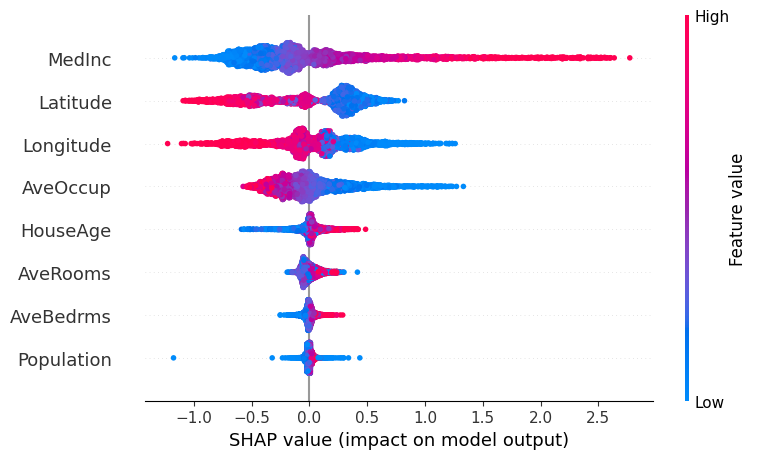

In [23]:
shap.summary_plot(shap_values, X_test)